Data science salary prediction dataset columns
'work_year', 'experience_level', 'employment_type', 'job_title','salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
'remote_ratio', 'company_location', 'company_size'

dependent variable is salary , other columns are independent variables. Prediction is based on the features which available independently.

In [ ]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# reading the dataset and checking the columns available in the dataset.
data = pd.read_csv('ds_salaries.csv')
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [ ]:
#column names present in the dataset
data.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [ ]:
#describing the data to get statistical data of continuous values
data.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


In [ ]:
#checking null count of the data
print("Total Null count of the data :")
print(data.isnull().sum())

Total Null count of the data :
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64


Its a cleaned dataset where all the features having zero null values

In [ ]:
data1 = [col for col in data.columns if col not in ['salary','salary_in_usd']]
data1

['work_year',
 'experience_level',
 'employment_type',
 'job_title',
 'salary_currency',
 'employee_residence',
 'remote_ratio',
 'company_location',
 'company_size']

In [ ]:
data_filter = data[data1]
data_filter

,work_year,experience_level,employment_type,job_title,salary_currency,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,EUR,ES,100,ES,L
1,2023,MI,CT,ML Engineer,USD,US,100,US,S
2,2023,MI,CT,ML Engineer,USD,US,100,US,S
3,2023,SE,FT,Data Scientist,USD,CA,100,CA,M
4,2023,SE,FT,Data Scientist,USD,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,USD,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,USD,US,100,US,L
3752,2020,EN,FT,Data Scientist,USD,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,USD,US,100,US,L


In [ ]:

def check_unique_values(data):
    for column in data.columns:
        unique_values = data[column].unique()
        value_counts = data[column].value_counts()

        print(f"Column: {column}")
        print("Unique Values:", unique_values)
        print("Value Counts:")
        print(value_counts)
        print("\n")

In [ ]:
#unqiue values for each column
check_unique_values(data_filter)

Column: work_year
Unique Values: [2023 2022 2020 2021]
Value Counts:
2023    1785
2022    1664
2021     230
2020      76
Name: work_year, dtype: int64


Column: experience_level
Unique Values: ['SE' 'MI' 'EN' 'EX']
Value Counts:
SE    2516
MI     805
EN     320
EX     114
Name: experience_level, dtype: int64


Column: employment_type
Unique Values: ['FT' 'CT' 'FL' 'PT']
Value Counts:
FT    3718
PT      17
CT      10
FL      10
Name: employment_type, dtype: int64


Column: job_title
Unique Values: ['Principal Data Scientist' 'ML Engineer' 'Data Scientist'
 'Applied Scientist' 'Data Analyst' 'Data Modeler' 'Research Engineer'
 'Analytics Engineer' 'Business Intelligence Engineer'
 'Machine Learning Engineer' 'Data Strategist' 'Data Engineer'
 'Computer Vision Engineer' 'Data Quality Analyst'
 'Compliance Data Analyst' 'Data Architect'
 'Applied Machine Learning Engineer' 'AI Developer' 'Research Scientist'
 'Data Analytics Manager' 'Business Data Analyst' 'Applied Data Scientist'
 'Staff

In [ ]:
#remote ratio is mentioned as three types now converting the percentage to string
data['remote_ratio'] = data['remote_ratio'].replace({0: 'no_remote', 50: 'partially_remote', 100: 'fully_remote'})


In [ ]:
#aggregating the salary with respect to experience level
cumulative_salary = data.groupby(['experience_level']).agg({'salary':'mean'})
cumulative_salary.sort_values(by=['salary'],ascending=False)

,salary
experience_level,
MI,248200.306832
EX,246802.201754
EN,188381.178125
SE,170048.965421


In [ ]:
#Aggregating the salary with respect to work year a
work_year = data.groupby(['work_year']).agg({'salary':'mean'})
work_year

,salary
work_year,
2020,386352.750000
2021,544163.252174
2022,165421.016827
2023,160381.480672


In [ ]:
#Aggregating the salary with respect to employment type
emp_type = data.groupby(['employment_type']).agg({'salary':'mean'})
emp_type.sort_values(by = ['salary'],ascending = False)

,salary
employment_type,
FL,288755.500000
FT,191146.539268
CT,113300.000000
PT,79910.823529


In [ ]:
#aggregating data based on job title
job_type = data.groupby(['job_title']).agg({'salary':'mean'})
job_type.sort_values(by = ['salary'],ascending = False).head(5)

,salary
job_title,
Head of Machine Learning,6.000000e+06
Principal Data Architect,3.000000e+06
Lead Machine Learning Engineer,2.548667e+06
Lead Data Scientist,9.284853e+05
Data Analytics Lead,9.225000e+05


In [ ]:
#aggregating data based on ompany size and job title
com_size = data.groupby(['company_size','job_title']).agg({'salary':'mean'})
com_size

salary
company_size job_title                              
L            AI Developer              250000.000000
             AI Programmer              70000.000000
             AI Scientist              352666.666667
             Analytics Engineer        130000.000000
             Applied Data Scientist    427000.000000
...                                              ...
S            Principal Data Analyst     75000.000000
             Principal Data Scientist  416000.000000
             Product Data Analyst       20000.000000
             Research Engineer          90000.000000
             Research Scientist         74500.000000

[179 rows x 1 columns]

In [ ]:
experience = data[['experience_level','salary']]
experience = experience.sort_values(by = ['salary'],ascending = False).head(10)
experience

,experience_level,salary
3669,MI,30400000
3646,MI,11000000
3574,MI,11000000
3475,MI,8500000
2966,SE,7500000
3754,SE,7000000
3476,MI,7000000
2358,EN,6600000
3192,EX,6000000
1462,MI,5000000


In [ ]:
job_title = data[['job_title','salary']]
job_title = job_title.sort_values(by = ['salary'],ascending = False).head(10)
job_title

,job_title,salary
3669,Data Scientist,30400000
3646,Data Scientist,11000000
3574,BI Data Analyst,11000000
3475,ML Engineer,8500000
2966,Lead Machine Learning Engineer,7500000
3754,Data Science Manager,7000000
3476,ML Engineer,7000000
2358,Data Scientist,6600000
3192,Head of Machine Learning,6000000
1462,Head of Data Science,5000000


In [ ]:
employe_type = data[['salary','employment_type']]
employe_type.sort_values(by=["salary", "employment_type"],ascending=False).head(10)

,salary,employment_type
3669,30400000,FT
3574,11000000,FT
3646,11000000,FT
3475,8500000,FT
2966,7500000,FT
3476,7000000,FT
3754,7000000,FT
2358,6600000,FT
3192,6000000,FT
1462,5000000,FT


<ipython-input-132-30bb13ab510c>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='salary', ylabel='Density'>

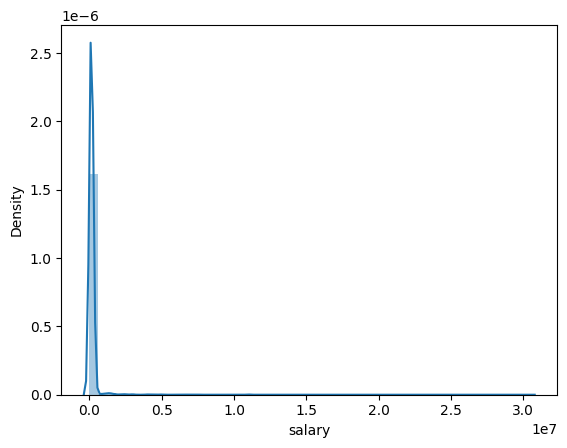

In [ ]:
sns.distplot(data['salary'])

<Axes: xlabel='salary'>

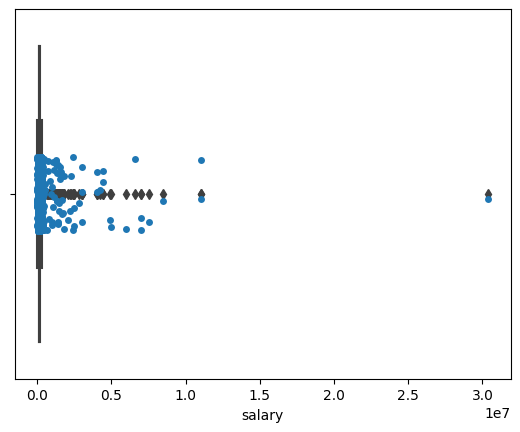

In [ ]:
#salary is in continous variable we need to check the outliers in the data
sns.boxplot(x = 'salary', data = data)
sns.stripplot(x = 'salary', data = data)

Text(0.5, 1.0, 'Distribution of salary in usd')

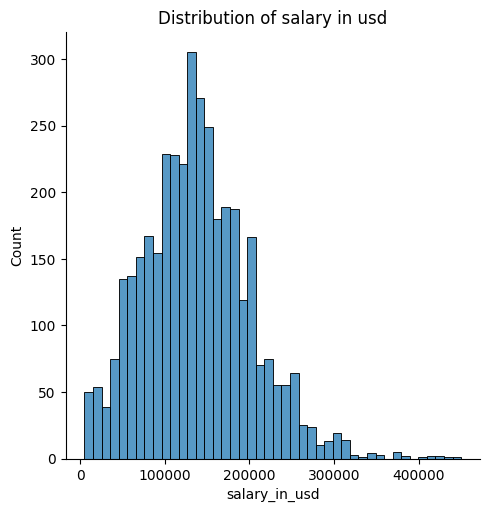

In [ ]:
sns.displot(data['salary_in_usd'])
plt.title("Distribution of salary in usd")

compared to salary, salary in usd distribution is much better. Data shows the normal distribution with little sknewness

<Axes: xlabel='salary_in_usd'>

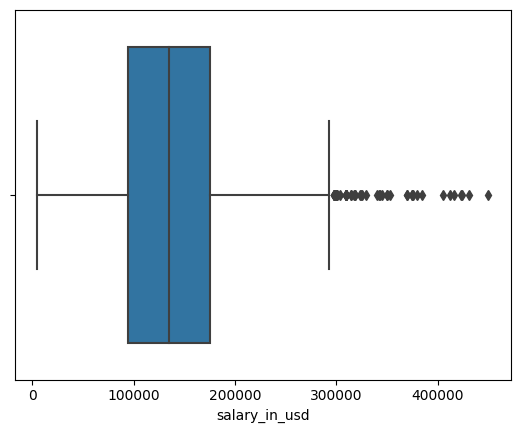

In [ ]:
sns.boxplot(x = 'salary_in_usd',data = data
)

In [ ]:
#to remove the outlier in data, IQR method is applied
Q1 = np.percentile(data['salary_in_usd'],25)
Q3 = np.percentile(data['salary_in_usd'],75)
IQR = Q3-Q1
IQR
min = Q1-1.5*IQR
max = Q3 +1.5*IQR
data['salary_in_usd'] = np.where(data['salary_in_usd']<min,(np.mean(data['salary_in_usd'])),data['salary_in_usd'])
data['salary_in_usd'] = np.where(data['salary_in_usd']>max,(np.mean(data['salary_in_usd'])),data['salary_in_usd'])

Text(0.5, 1.0, 'countplot for employment type')

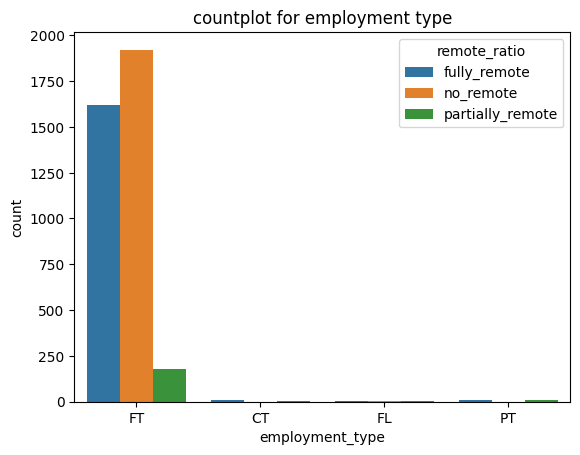

In [ ]:
sns.countplot(x="employment_type",hue="remote_ratio", data=data)
plt.title("countplot for employment type")

Most of the employees are belongs to no remote type and second largest is fully remote type

In [ ]:
##encoding the categorical data . In this dataset most of them are belongs
#to nominal category whih does have any order to describe or rank to show .
data = pd.get_dummies(data, columns=['experience_level', 'work_year', 'company_location','employment_type', 'company_size','job_title', 'employee_residence', 'remote_ratio','salary_currency']
                   ,drop_first=True)

In [ ]:
x = data.drop(columns = ['salary_in_usd']).values
y = data[['salary_in_usd']].values

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [ ]:
x_train


array([[205600,      0,      0, ...,      0,      0,      1],
       [ 25000,      0,      0, ...,      0,      0,      1],
       [191475,      0,      0, ...,      0,      0,      1],
       ...,
       [172800,      0,      0, ...,      0,      0,      1],
       [145000,      0,      0, ...,      0,      0,      1],
       [120000,      0,      0, ...,      0,      0,      1]])

In [ ]:
from sklearn.preprocessing import StandardScaler

scaling = StandardScaler()
scaling.fit_transform(x_train,y_train)
X_train_scaled = scaling.transform(x_train)
X_test_scaled = scaling.transform(x_test)

In [ ]:

import xgboost as xgb
from sklearn import metrics
from sklearn.metrics import mean_squared_error as MSE
xgboost = xgb.XGBRegressor()
xgboost.fit(x_train, y_train)
y_predxgb = xgboost.predict(x_test)
print(xgboost.score(x_train, y_train))
rmse = np.sqrt(MSE(y_test,y_predxgb))
print("RMSE : % f" %(rmse))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predxgb))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predxgb))
print('R2- SCORE:', metrics.r2_score(y_test,y_predxgb))

0.9999568095164715
RMSE :  3170.222669
Mean Absolute Error: 717.2304931811609
Mean Squared Error: 10050311.768718366
R2- SCORE: 0.9969426122102769


In [ ]:

import warnings
warnings.simplefilter(action = 'ignore',category = FutureWarning)
from sklearn.model_selection import cross_validate

crossval = cross_validate(xgboost, x_train, y_train, cv=10, scoring = "r2" , return_train_score=True)
crossval['test_score'].mean(), crossval['train_score'].mean()

(0.9815097482121686, 0.9999549541012002)

Text(0.5, 1.0, 'Difference beteween predicted and actual')

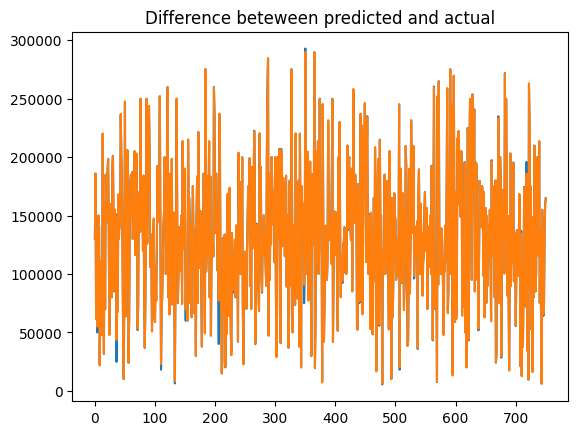

In [ ]:
plt.plot(y_test)
plt.plot(y_predxgb)
plt.title("Difference beteween predicted and actual")
